# Algoritmos Clúster

## Introducción

Los clústeres son grupos de objetos que son similares entre sí y son diferentes de los objetos en otros grupos. Los algoritmos de agrupamiento son algoritmos no supervisados que se utilizan para encontrar grupos de objetos similares en un conjunto de datos. Los algoritmos de agrupamiento se utilizan en una amplia variedad de aplicaciones, como la segmentación de clientes, la agrupación de documentos, la agrupación de genes y la agrupación de imágenes.

A continuación, se presentan K means, un algoritmo de agrupamiento muy popular y ampliamente utilizado.

## Casos de Uso de K-Means

*Tomado de: https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/*

El algoritmo de Clustering K-means es uno de los más usados para encontrar grupos ocultos, o sospechados en teoría sobre un conjunto de datos no etiquetado. Esto puede servir para confirmar -o desterrar- alguna teoría que teníamos asumida de nuestros datos. Y también puede ayudarnos a descubrir relaciones asombrosas entre conjuntos de datos, que de manera manual, no hubiéramos reconocido. Una vez que el algoritmo ha ejecutado y obtenido las etiquetas, será fácil clasificar nuevos valores o muestras entre los grupos obtenidos.

Algunos casos de uso son:

   * Segmentación por Comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
   * Categorización de Inventario: agrupar productos por actividad en sus ventas
   * Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal



## Ejercicio Python de K-means
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [33]:
!pip install prince


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Como ejemplo utilizaremos de entradas un conjunto de datos que obtuvo el autor, en el que se analizaban rasgos de la personalidad de usuarios de Twitter. El [autor](https://www.aprendemachinelearning.com/sobre-mi/) ha  filtrado a 140 “famosos” del mundo en diferentes areas: deporte, cantantes, actores, etc. Basado en una metodología de psicología conocida como “Ocean: The Big Five” tendemos como características de entrada:

* usuario (el nombre en Twitter)
*    “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
*   “co” =Conscientiousness – grado de orden, prolijidad, organización
*    “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
*    “ag” = Agreeableness – grado de empatía con los demás, temperamento
*    “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.

*    Wordcount – Cantidad promedio de palabras usadas en sus tweets
*    Categoria – Actividad laboral del usuario (actor, cantante, etc.)

Utilizaremos el algoritmo K-means para que agrupe estos usuarios -no por su actividad laboral- si no, por sus similitudes en la personalidad. 

En la siguiente base de datos las categoría que representan la actividad laborla de los famosos están codificados según el siguiente diccionario;
```python
{1:"actores", 2:"cantantes", 3:"modelo", 4:"TV", 5:"radio", 6:"tecnología", 7:"deportes", 8:"politica", 9:"escritor"}
```

## Cargamos los datos de entrada del archivo csv

In [91]:
dataframe = pd.read_csv("../data/analisis.csv")
dataframe

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [95]:
dataframe.columns=["usuario","Apertura Mental","Escrupulosidad","Extraversión","Empatia","Neuroticismo","Cantidad de palabras","Categoría"]

In [96]:
dataframe["Categoría"]=dataframe["Categoría"].replace({1:"actores", 2:"cantantes", 3:"modelo", 4:"TV", 5:"radio", 6:"tecnología", 7:"deportes", 8:"politica", 9:"escritor"})

In [97]:
dataframe

,usuario,Apertura Mental,Escrupulosidad,Extraversión,Empatia,Neuroticismo,Cantidad de palabras,Categoría
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,deportes
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,deportes
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,TV
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,cantantes
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,TV
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,deportes
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,TV
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,cantantes
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,actores


In [39]:
dataframe.describe()

,Apertura Mental,Escrupulosidad,Extraversión,Empatia,Neuroticismo,Cantidad de palabras
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200


In [40]:
#vemos cuantos usuarios hay de cada categoria
dataframe.groupby('Categoría').size()

Categoría
TV            19
actores       27
cantantes     34
deportes      17
escritor       6
modelo         9
politica      16
radio          4
tecnología     8
dtype: int64

## Visualizamos los datos

Visualizaremos la distribución de cada rasgo psicológico en esta población.

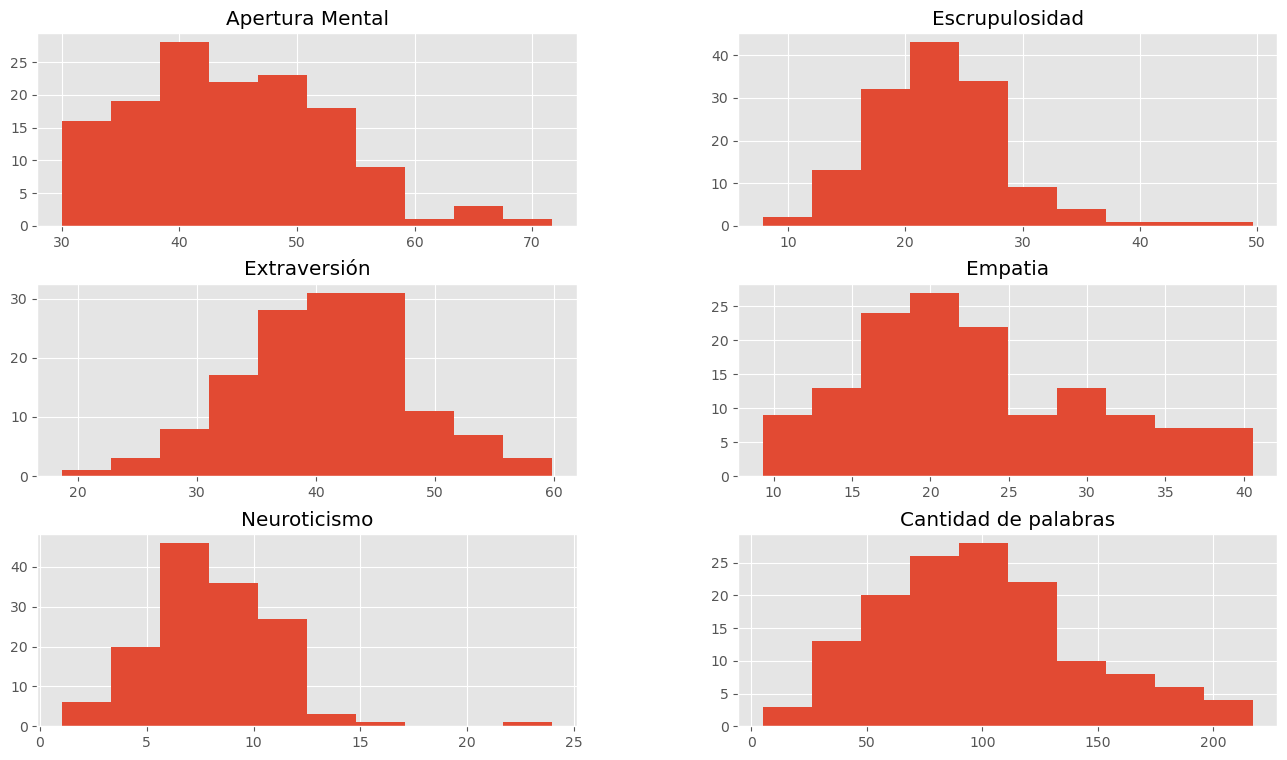

In [41]:
dataframe.drop(['Categoría'], axis=1).hist()
plt.show()

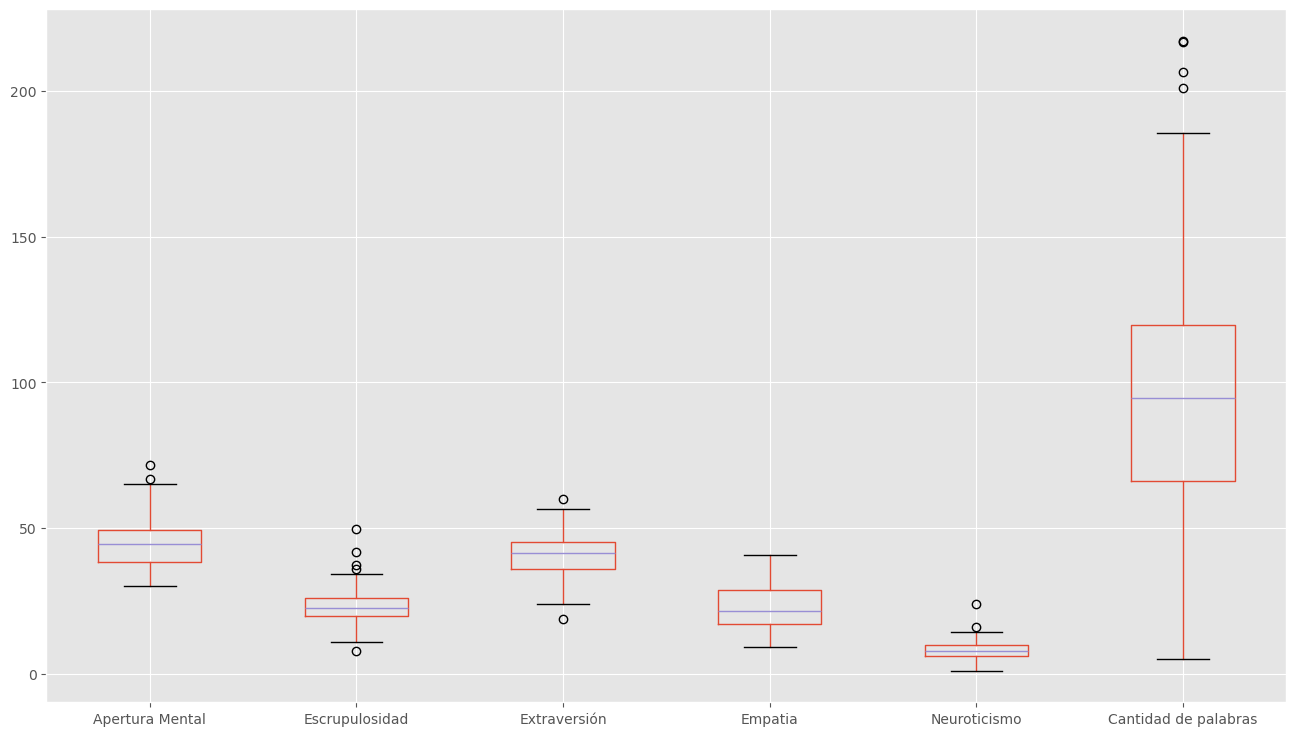

In [42]:
dataframe.drop(['Categoría'],axis=1).boxplot()
plt.show()

C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

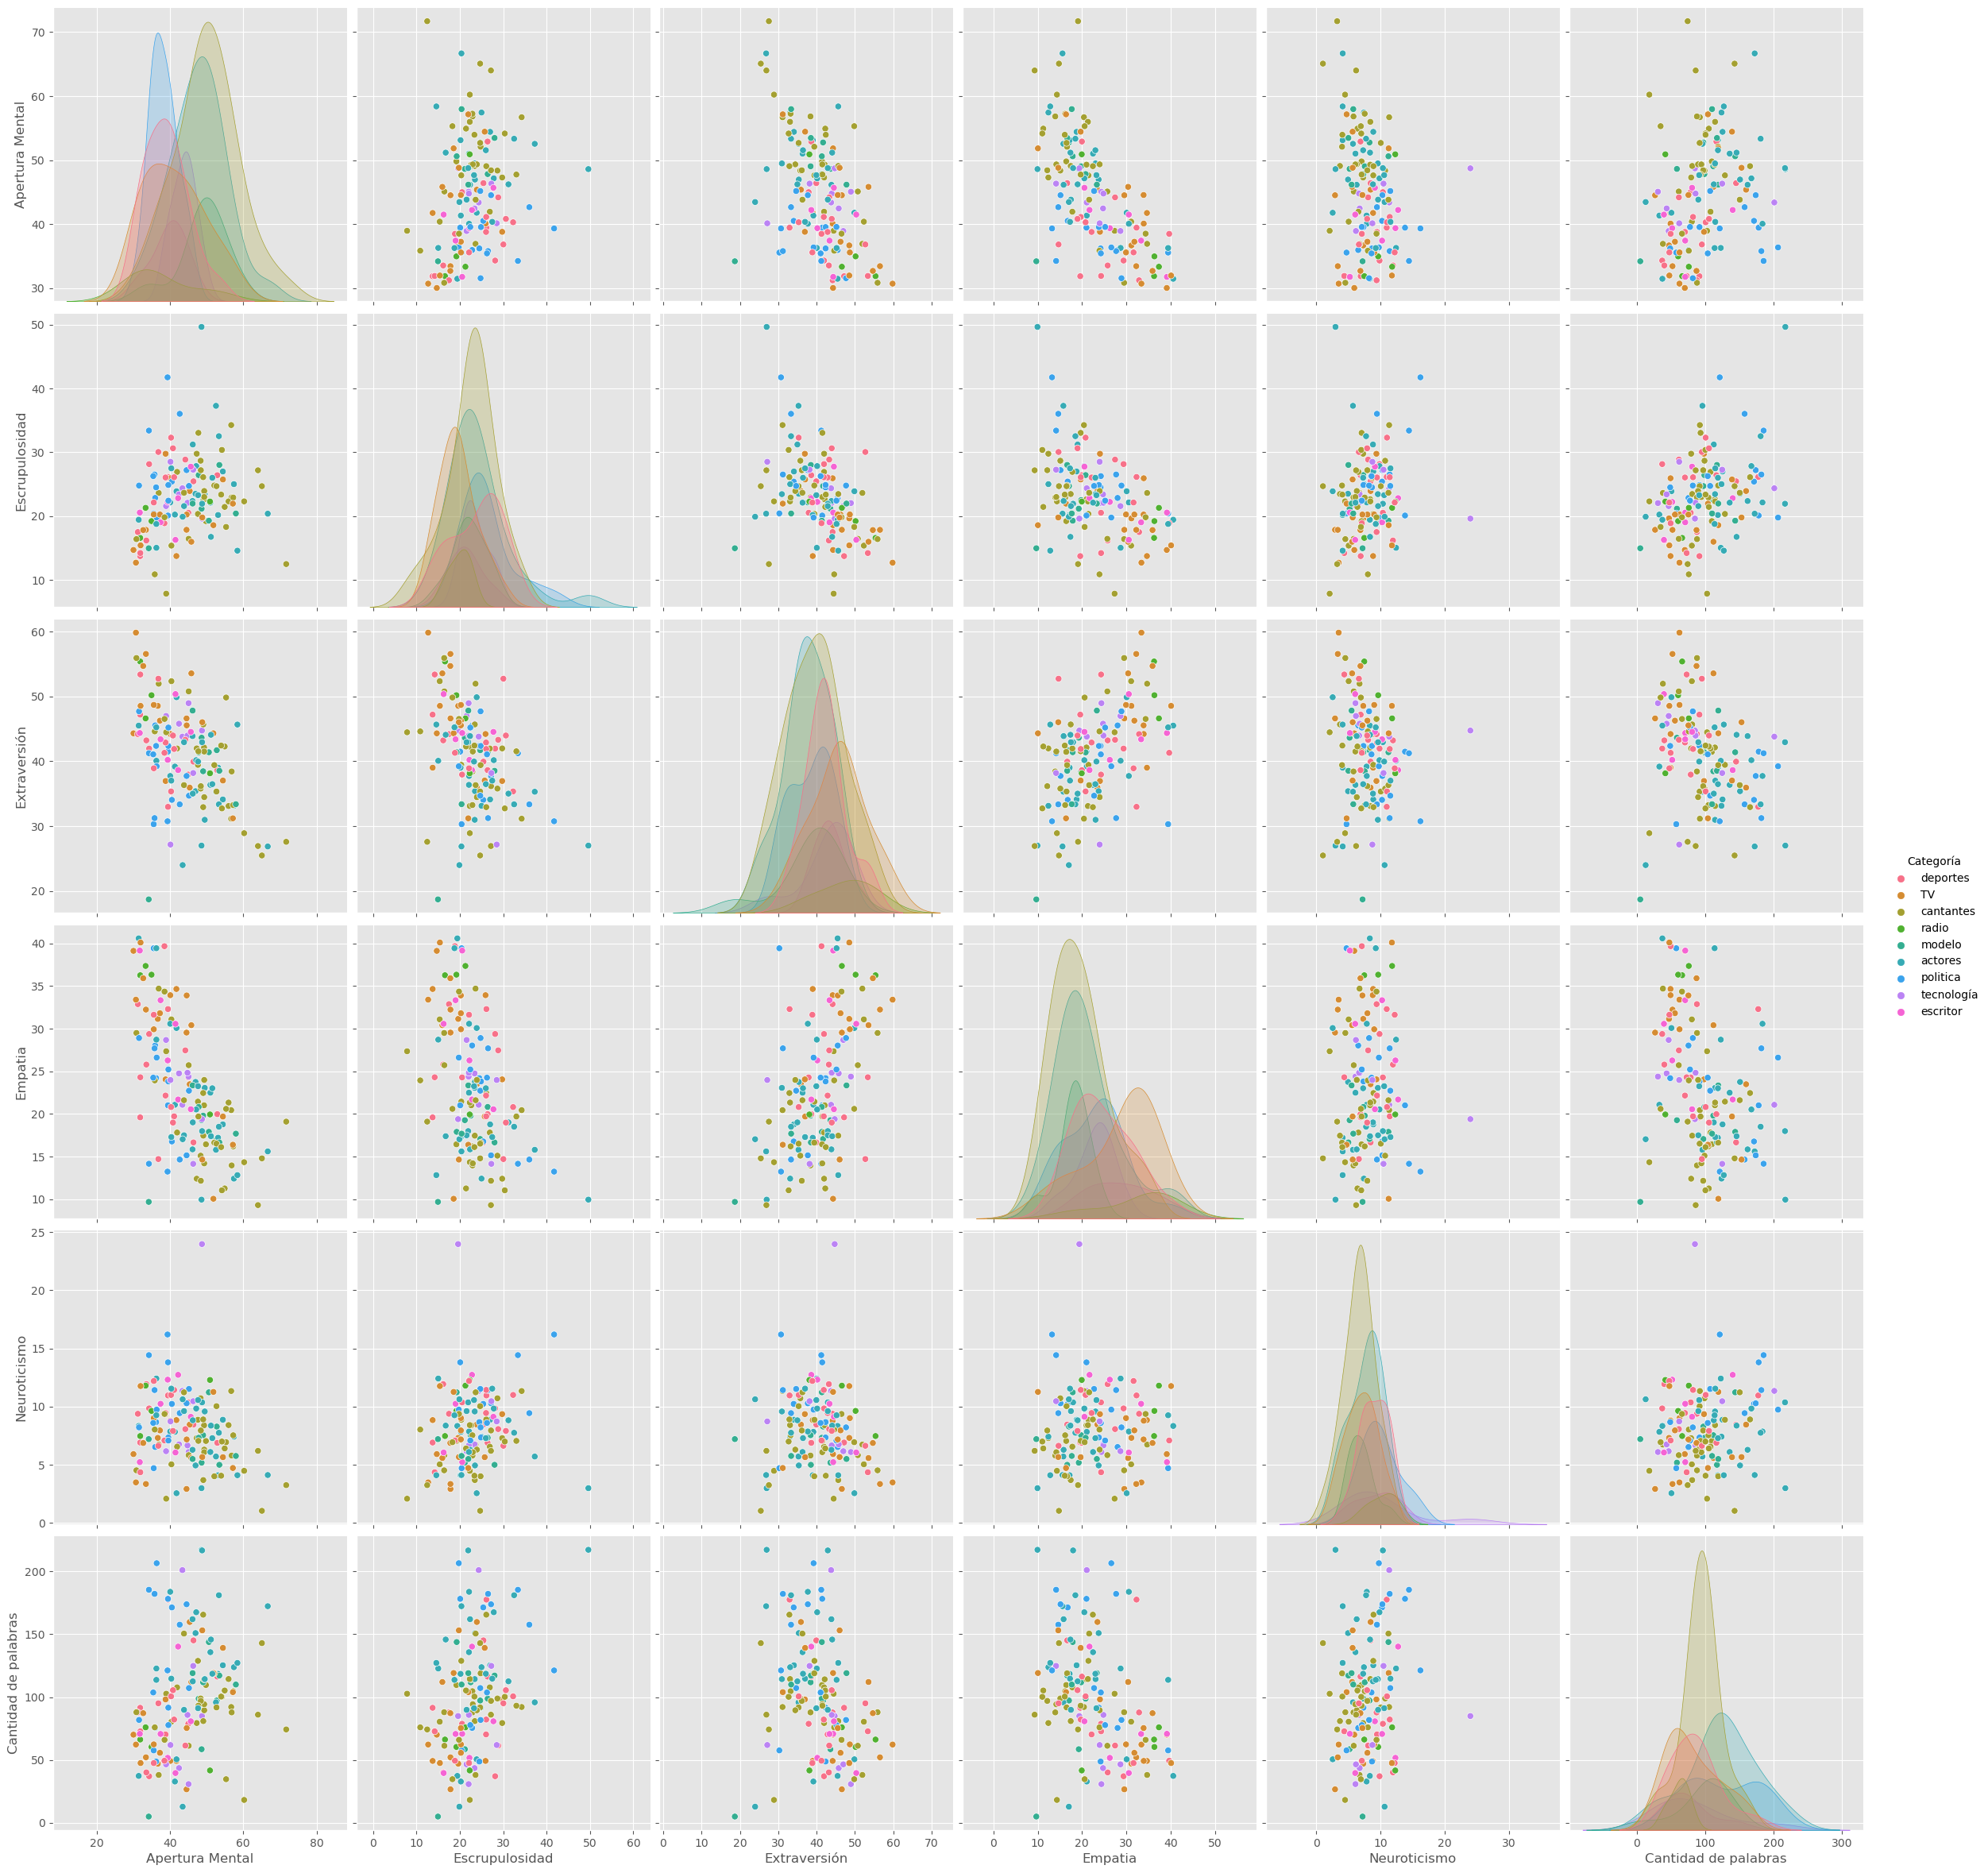

In [43]:
sb.pairplot(dataframe.dropna(), hue='Categoría',height=4,vars=dataframe.columns[1:-1],kind='scatter')

Hagamos componentes principales para tratar de disminuir la dimensionalidad de estos datos.

*Nota: Evidentemente el gráfico muestra poca correlación entre variables, es posible que el PCA no sea provechoso*

In [44]:
pd.DataFrame(data=dataframe[dataframe.columns[1:-1]]).corr()

,Apertura Mental,Escrupulosidad,Extraversión,Empatia,Neuroticismo,Cantidad de palabras
Apertura Mental,1.000000,0.204787,-0.508838,-0.662599,-0.238146,0.270123
Escrupulosidad,0.204787,1.000000,-0.425614,-0.431095,0.180469,0.346416
Extraversión,-0.508838,-0.425614,1.000000,0.497006,-0.118141,-0.291869
Empatia,-0.662599,-0.431095,0.497006,1.000000,0.003082,-0.381874
Neuroticismo,-0.238146,0.180469,-0.118141,0.003082,1.000000,0.134665
Cantidad de palabras,0.270123,0.346416,-0.291869,-0.381874,0.134665,1.000000


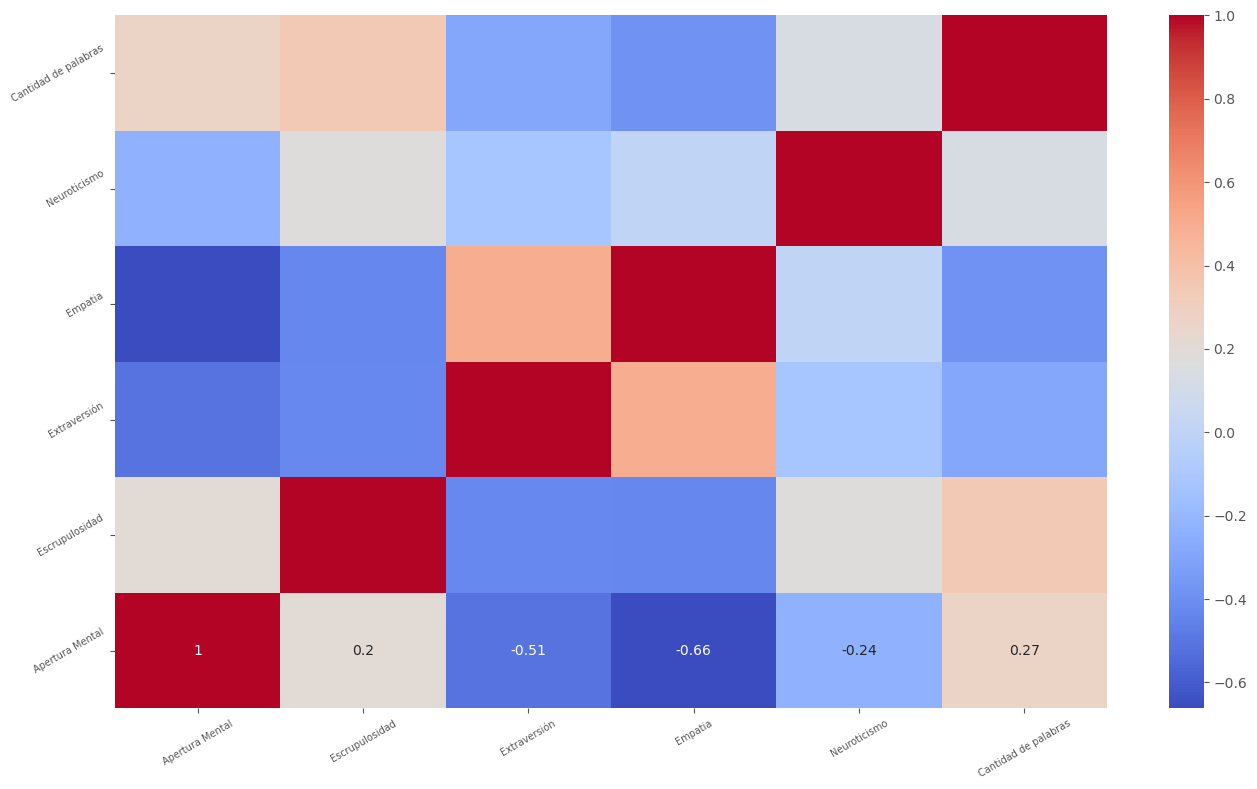

In [46]:
fig, ax = plt.subplots()
s=sb.heatmap(pd.DataFrame(data=dataframe[dataframe.columns[1:-1]]).corr(),cmap='coolwarm',annot=True) 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
ax.set_xlim(0,6)
ax.set_ylim(0,6)
plt.show()

In [27]:
import prince
pca = prince.PCA(
     n_components=6,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
 )
pca = pca.fit(dataframe[dataframe.columns[1:-1]])

ValueError: engine has to be one of ('fbpca', 'scipy', 'sklearn')

In [47]:
import prince
pca = prince.PCA(
     n_components=6,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='sklearn',  # Cambiado de 'auto' a 'scipy'
     random_state=42
 )
pca = pca.fit(dataframe[dataframe.columns[1:-1]])


In [29]:
np.cumsum(pca.explained_inertia_)

AttributeError: 'PCA' object has no attribute 'explained_inertia_'

In [49]:
pca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,2.641,44.01%,44.01%
1,1.266,21.09%,65.10%
2,0.729,12.16%,77.26%
3,0.631,10.51%,87.77%
4,0.479,7.98%,95.75%
5,0.255,4.25%,100.00%


In [53]:
pca.plot(
    dataframe[dataframe.columns[1:-1]],
    x_component=0,
    y_component=1,
    show_row_markers=True,
    show_column_markers=True,
    show_row_labels=False,
    row_labels_column=None,  # for DataFrames with a MultiIndex
    show_column_labels=False)

C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

In [55]:
pca.column_coordinates_

component,0,1,2,3,4,5
variable,,,,,,
Apertura Mental,0.748309,-0.502641,0.082549,-0.220113,-0.093278,-0.351313
Escrupulosidad,0.647436,0.386627,0.048550,0.638319,-0.076517,-0.125234
Extraversión,-0.766704,-0.050628,-0.384683,0.087273,-0.487485,-0.127916
Empatia,-0.843666,0.155196,-0.032196,0.079222,0.409264,-0.298886
Neuroticismo,0.065308,0.874312,0.230792,-0.371239,-0.173220,-0.101119
Cantidad de palabras,0.598032,0.268936,-0.719657,-0.151436,0.170856,0.000572


## Creamos el modelo

In [98]:
from sklearn.preprocessing import StandardScaler
scala=StandardScaler()
X=scala.fit_transform(dataframe[dataframe.columns[1:-1]])


In [99]:

##X = np.array(dataframe[dataframe.columns[1:-1]])
y = np.array(dataframe['Categoría'])
yu=np.array(dataframe['Categoría'].unique())
X.shape

(140, 6)

In [56]:
dicty={}
for i in enumerate(yu):
    dicty[i[1]]=i[0]
dicty

{'deportes': 0,
 'TV': 1,
 'cantantes': 2,
 'radio': 3,
 'modelo': 4,
 'actores': 5,
 'politica': 6,
 'tecnología': 7,
 'escritor': 8}

In [100]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[dicty[row]])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

<Figure size 1600x900 with 0 Axes>

# Buscamos el valor K

C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

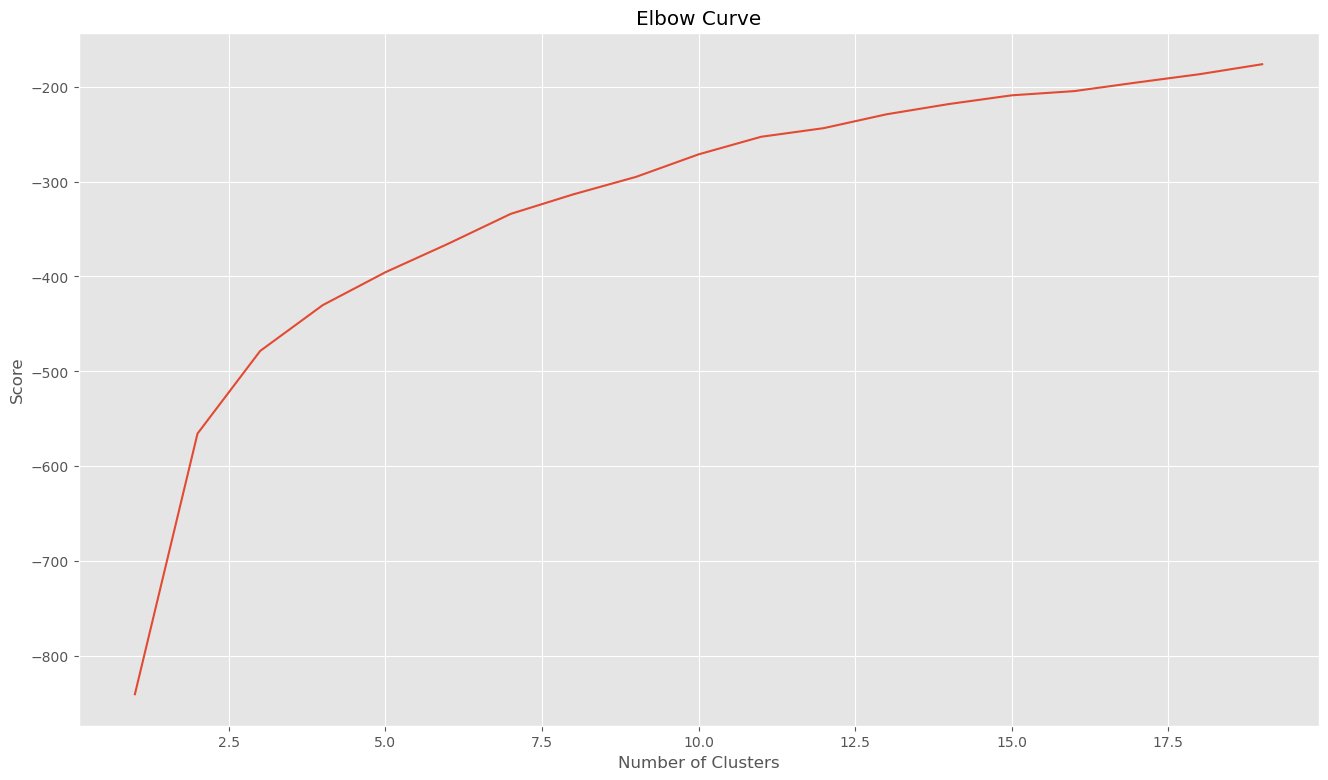

In [101]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [103]:
# Para el ejercicio, elijo 3 como un buen valor de K. Pero podría ser otro.
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[-0.33236405  0.14908308  0.05313221 -0.02855904  0.22928286 -0.74151663]
 [ 1.03256237  0.32088514 -0.55173131 -0.78412687 -0.44719393  0.36639444]
 [-0.96598331 -0.86864787  1.00238004  1.26737421 -0.38969529 -0.71361466]
 [-0.22986965  0.45526568 -0.44574773 -0.26324687  1.20140686  1.28015899]]


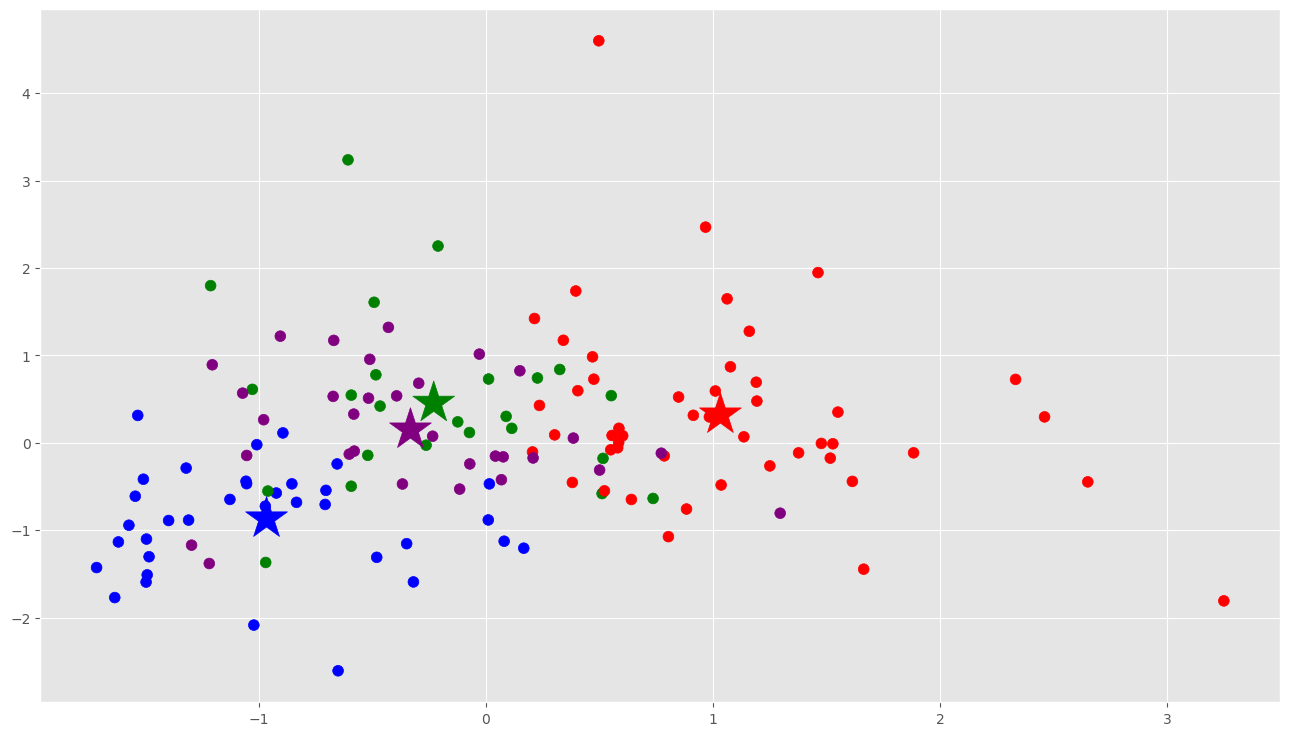

In [104]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['purple','red','blue',"green"]
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig,ax=plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

In [ ]:
C[:,5]

In [105]:
dataframe["Cluster"]=asignar
dataframe

,usuario,Apertura Mental,Escrupulosidad,Extraversión,Empatia,Neuroticismo,Cantidad de palabras,Categoría,Cluster
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,deportes,purple
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,deportes,purple
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,TV,blue
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,cantantes,blue
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,TV,blue
...,...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,deportes,purple
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,TV,blue
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,cantantes,red
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,actores,red


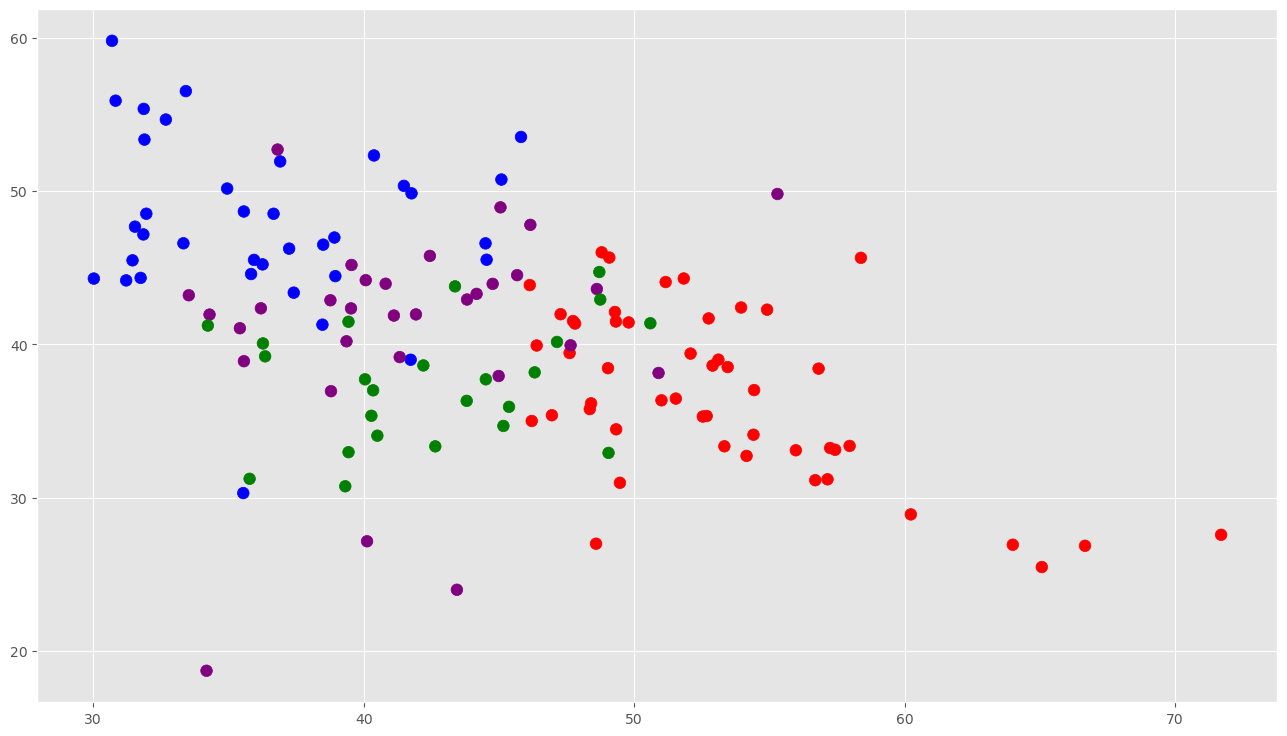

In [107]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['Apertura Mental'].values
f2 = dataframe['Extraversión'].values

plt.scatter(f1, f2, c=asignar, s=70)
#plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [81]:
pca_df=pca.row_coordinates(dataframe)
pca_df["cluster"]=asignar

In [ ]:
dataframe

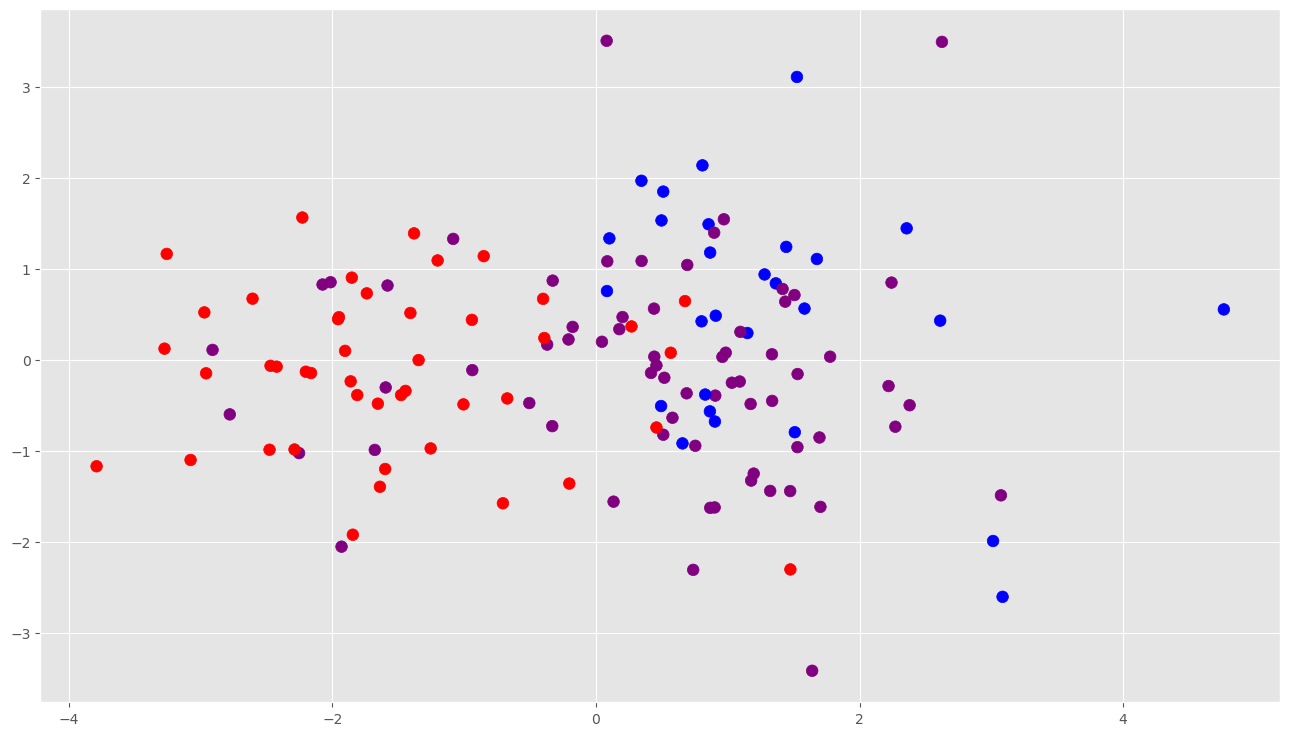

In [83]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = pca_df[0].values
f2 = pca_df[1].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.show()

In [108]:
df_rojo=dataframe[dataframe["Cluster"]=="red"]
df_purpura=dataframe[dataframe["Cluster"]=="purple"]
df_azul=dataframe[dataframe["Cluster"]=="blue"]
df_verde=dataframe[dataframe["Cluster"]=="green"]

In [109]:
df_rojo.describe()

,Apertura Mental,Escrupulosidad,Extraversión,Empatia,Neuroticismo,Cantidad de palabras
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,53.083548,24.836998,36.814286,16.935855,6.645827,115.039855
std,5.565386,5.960110,5.475843,3.758512,2.210754,31.381162
min,46.137348,12.489274,25.466170,9.305985,1.030213,18.239100
25%,49.028308,22.106563,33.237462,14.642985,4.988903,97.000000
50%,52.535221,23.499024,36.465344,16.655907,6.879237,112.555600
75%,55.974031,26.992121,41.494915,19.694385,8.279847,127.205900
max,71.696129,49.637863,46.014478,23.982462,11.337791,217.183200


In [110]:
df_purpura.describe()

,Apertura Mental,Escrupulosidad,Extraversión,Empatia,Neuroticismo,Cantidad de palabras
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,41.624203,23.841227,41.144830,22.700630,8.694452,65.677884
std,5.102929,3.965575,6.970701,4.816437,2.060986,29.526311
min,33.531771,14.967083,18.693542,9.682292,5.176515,5.020800
25%,38.777491,21.770328,39.558636,19.825289,7.006990,42.622600
50%,41.114000,23.285909,42.358817,23.810769,8.664086,61.924200
75%,44.876078,26.596107,44.078158,24.785112,10.101990,90.551700
max,55.293566,30.629470,52.722403,33.921417,12.314729,119.109400


In [111]:
df_azul.describe()

,Apertura Mental,Escrupulosidad,Extraversión,Empatia,Neuroticismo,Cantidad de palabras
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,36.304603,17.942418,47.941006,32.588245,6.819955,66.921031
std,4.587491,3.665114,5.489115,5.095818,2.449113,20.622178
min,30.020465,7.852756,30.295484,19.594331,2.073937,26.687000
25%,31.884885,15.841446,45.068145,29.523759,5.173658,50.268275
50%,35.888907,18.313223,47.080943,32.550421,6.885765,66.153450
75%,38.922309,20.254545,51.060781,36.275079,8.458764,77.101675
max,45.813043,24.789355,59.824844,40.583162,11.800472,113.739100


In [112]:
df_verde.describe()

,Apertura Mental,Escrupulosidad,Extraversión,Empatia,Neuroticismo,Cantidad de palabras
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,42.484702,25.615873,37.573080,20.910027,11.638407,155.751804
std,4.580478,5.837832,3.940251,5.310665,3.225826,35.040535
min,34.235923,15.037348,30.739350,13.231220,7.855909,84.964100
25%,39.436287,22.091594,34.519191,17.156148,10.129519,124.327825
50%,42.423122,25.066626,37.722895,20.904881,11.112514,162.675800
75%,45.607195,27.325307,40.429641,22.909081,11.761586,179.172475
max,50.594462,41.741463,44.728513,32.291591,23.978462,216.691100


In [ ]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['Apertura Mental'].values
f2 = dataframe['Extraversión'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
f1 = dataframe['Extraversión'].values
f2 = dataframe['Empatia'].values

'''
# este codigo comentado agrega las categorias sobre cada punto
for label, x, y in zip(dataframe['categoria'].values, f1, f2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 3], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['Categoría'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

In [ ]:
!pip install tabulate

In [ ]:
from IPython.core.display import display,Markdown
# Veamos cuantos usuarios en cada categoria
for i in range(5):
    group_referrer_index = copy['label'] ==i
    group_referrals = copy[group_referrer_index]
    diversidadGrupo =  pd.DataFrame()
    diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
    display(Markdown(diversidadGrupo.to_markdown()))
    print()

In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

In [ ]:
#Los usuarios más cercanos al centroide
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

In [ ]:
from IPython.core.display import display, HTML

In [ ]:
#miramos los usuarios de cada grupo
text="<table><tr> <td> Grupo 0</td><td> Grupo 1</td><td> Grupo 2</td><td> Grupo 3</td><td> Grupo 4</td></tr><tr>"
for i in range(5):
    text+="<td>"
    for index, row in copy.iterrows():
        if row["label"] == i:
            text+="<p>"+ row["usuario"]+" " +row["categoria"]+"</p>"
    text+="</td>"
text+="</tr></table>"
display(HTML(text))

        

# Clasificación de nuevos registros

In [ ]:
X_new = np.array([[45.92,57.74,15.66,12.11,97,89.9]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

#NOTA: en el array podemos poner más de un array para evaluar a varios usuarios nuevos a la vez

NOTA FINAL: Los resultados obtenidos pueden varias de ejecución en ejecución pues al inicializar aleatoriamente los centroids, podemos obtener grupos distintos o los mismos pero en distinto orden y color